<a href="https://colab.research.google.com/github/shuvo1165/Machine-Learning/blob/main/eye_reaction_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = '/content/drive/MyDrive/Kaggle/eye reaction'


CATEGORIES = ["angry", "disgust", "sad"]

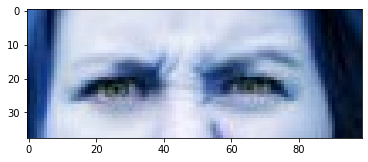

In [2]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[[ 58 111 192]
  [ 62 111 189]
  [ 59 102 175]
  ...
  [ 22  51  96]
  [ 18  45  95]
  [ 12  38  92]]

 [[ 58 111 192]
  [ 59 108 186]
  [ 53  96 169]
  ...
  [ 20  49  93]
  [ 18  48  97]
  [ 18  45  96]]

 [[ 58 111 191]
  [ 56 106 182]
  [ 45  89 160]
  ...
  [ 16  45  89]
  [ 17  49  98]
  [ 23  52 103]]

 ...

 [[  0  25  76]
  [ 10  44  97]
  [ 27  63 123]
  ...
  [ 10  20  37]
  [  6  18  36]
  [  7  18  38]]

 [[  0  28  77]
  [ 13  45  98]
  [ 28  62 122]
  ...
  [ 10  20  37]
  [ 10  22  40]
  [  7  19  37]]

 [[  0  29  78]
  [ 15  46  99]
  [ 26  60 119]
  ...
  [  6  16  33]
  [ 10  22  40]
  [  4  16  34]]]


In [4]:
print(img_array.shape)

(38, 99, 3)


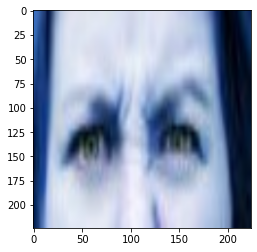

In [5]:
IMG_SHAPE = (224,224)

new_array = cv2.resize(img_array,IMG_SHAPE )
plt.imshow(new_array)
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array,IMG_SHAPE )  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 30/30 [00:32<00:00,  1.07s/it]

90


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
2
0
0
0
2
1
1
2
0


In [9]:
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

print(X_train[0].reshape(-1,224 , 224, 3))

[[[[208 223 241]
   [207 222 240]
   [208 223 240]
   ...
   [180 182 191]
   [176 176 186]
   [172 174 183]]

  [[208 223 241]
   [207 222 241]
   [208 223 240]
   ...
   [180 181 191]
   [174 175 185]
   [171 173 182]]

  [[207 223 240]
   [207 222 241]
   [208 223 240]
   ...
   [180 180 190]
   [173 174 184]
   [169 172 181]]

  ...

  [[210 224 245]
   [210 224 245]
   [210 224 246]
   ...
   [150 155 170]
   [152 157 172]
   [155 158 174]]

  [[210 224 245]
   [209 223 245]
   [210 224 246]
   ...
   [149 155 169]
   [152 156 171]
   [155 159 174]]

  [[210 224 245]
   [209 223 245]
   [210 224 246]
   ...
   [149 154 169]
   [152 156 171]
   [156 159 174]]]]


In [10]:
X_train = np.array(X_train).reshape(-1, 224, 224, 3)

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 3)

In [12]:
X_train.shape

(90, 224, 224, 3)

In [13]:
y_train.shape

(90, 3)

In [14]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X_train.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
X=np.array(X/255.0)

y=np.array(y)

In [17]:
X[0]

array([[[0.81568627, 0.8745098 , 0.94509804],
        [0.81176471, 0.87058824, 0.94117647],
        [0.81568627, 0.8745098 , 0.94117647],
        ...,
        [0.70588235, 0.71372549, 0.74901961],
        [0.69019608, 0.69019608, 0.72941176],
        [0.6745098 , 0.68235294, 0.71764706]],

       [[0.81568627, 0.8745098 , 0.94509804],
        [0.81176471, 0.87058824, 0.94509804],
        [0.81568627, 0.8745098 , 0.94117647],
        ...,
        [0.70588235, 0.70980392, 0.74901961],
        [0.68235294, 0.68627451, 0.7254902 ],
        [0.67058824, 0.67843137, 0.71372549]],

       [[0.81176471, 0.8745098 , 0.94117647],
        [0.81176471, 0.87058824, 0.94509804],
        [0.81568627, 0.8745098 , 0.94117647],
        ...,
        [0.70588235, 0.70588235, 0.74509804],
        [0.67843137, 0.68235294, 0.72156863],
        [0.6627451 , 0.6745098 , 0.70980392]],

       ...,

       [[0.82352941, 0.87843137, 0.96078431],
        [0.82352941, 0.87843137, 0.96078431],
        [0.82352941, 0

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [19]:
vgg = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

58892288/58889256 [==============================] - 1s 0us/step


In [20]:
for layer in vgg.layers:
    layer.trainable = False

In [33]:
from tensorflow.keras import layers
standard_classifier = tf.keras.Sequential()
standard_classifier.add(layers.Flatten())
standard_classifier.add(layers.BatchNormalization())
standard_classifier.add(layers.Dense(100))
standard_classifier.add(layers.Activation('relu'))
standard_classifier.add(layers.Dense(3))
standard_classifier.add(layers.Activation('softmax'))

In [22]:
vgg16_model = tf.keras.Sequential([
  vgg,
  standard_classifier
])

In [23]:
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
vgg16_model.fit(X, y, batch_size=5, epochs=5, validation_split=0.2)

Epoch 1/5
15/15 [==============================] - 1s 38ms/step - loss: 7.7817e-08 - accuracy: 1.0000 - val_loss: 1.7900 - val_accuracy: 0.8333
Epoch 2/5
15/15 [==============================] - 1s 36ms/step - loss: 0.6589 - accuracy: 0.9444 - val_loss: 2.0295 - val_accuracy: 0.8333
Epoch 3/5
15/15 [==============================] - 1s 36ms/step - loss: 1.1737 - accuracy: 0.9167 - val_loss: 2.8515 - val_accuracy: 0.8889
Epoch 4/5
15/15 [==============================] - 1s 36ms/step - loss: 0.0640 - accuracy: 0.9861 - val_loss: 2.9830 - val_accuracy: 0.8333
Epoch 5/5
15/15 [==============================] - 1s 36ms/step - loss: 0.0117 - accuracy: 0.9861 - val_loss: 2.9012 - val_accuracy: 0.8889


In [30]:
inception = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

87916544/87910968 [==============================] - 1s 0us/step


In [31]:
for layer in inception.layers:
    layer.trainable = False

In [34]:
inceptionV3_model = tf.keras.Sequential([
  inception,
  standard_classifier
])

In [35]:
inceptionV3_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
inceptionV3_model.fit(X, y, batch_size=5, epochs=12, validation_split=0.2)

Epoch 1/12
15/15 [==============================] - 0s 33ms/step - loss: 1.5797 - accuracy: 0.9583 - val_loss: 28.9363 - val_accuracy: 0.3889
Epoch 2/12
15/15 [==============================] - 0s 24ms/step - loss: 3.6739 - accuracy: 0.9306 - val_loss: 21.2769 - val_accuracy: 0.5000
Epoch 3/12
15/15 [==============================] - 0s 24ms/step - loss: 2.9088 - accuracy: 0.9444 - val_loss: 19.7311 - val_accuracy: 0.6667
Epoch 4/12
15/15 [==============================] - 0s 25ms/step - loss: 2.2602 - accuracy: 0.9444 - val_loss: 26.9819 - val_accuracy: 0.6111
Epoch 5/12
15/15 [==============================] - 0s 25ms/step - loss: 0.7772 - accuracy: 0.9583 - val_loss: 33.2804 - val_accuracy: 0.6111
Epoch 6/12
15/15 [==============================] - 0s 25ms/step - loss: 1.4940 - accuracy: 0.9722 - val_loss: 33.0321 - val_accuracy: 0.5556
Epoch 7/12
15/15 [==============================] - 0s 24ms/step - loss: 2.4135 - accuracy: 0.9722 - val_loss: 33.8074 - val_accuracy: 0.5000
Epoch 